# Numpy基础：数组与向量化计算

Numpy， 是Numerical Python的简称。数值计算的基础包。
> numpy的常见内容：
+ ndarray, 一种高效多维数组，提供数组便捷操作以及灵活的广播操作
+ 对所有数据快速矩阵运算，无需编写循环程序
+ 对硬盘中的数据读写，对内存映射文件进行操作
+ 线性代数，随机数以及傅里叶变换功能
+ 连接Numpy到C，C++和Fortran语言的API

Numpy本身并不提供建模和科学函数，理解numpy的数组以及计算将更好地利用基于数组的工具，比如pandas。<br>
___
> 对于大多数的数据分析，主要关注：
+ 数据处理，清洗，构建子集，过滤，变换以及其他计算中进行的快速量化计算
+ 常见的数组算法，sort, unique, set等
+ 高效的描述性统计和聚合/概述数据
+ 数据排列和相关数据操作，例如对异构数据的merge和join
+ 使用数组表达式表达条件逻辑，代替if-elif-else
+ 分组数据的操作（聚合，变换以及函数式操作）

In [1]:
import numpy as np

In [2]:
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [11]:
%time for _ in range(10): my_arr2 = my_arr * 2

Wall time: 34.4 ms


In [5]:
%time for _ in range(10): my_list2 = [item*2 for item in my_list]

Wall time: 856 ms


## NumPy ndarray: 多维数组对象

> ndarray: 快速，灵活的大型数据容器。

In [12]:
data = np.random.randn(2, 3)
data

array([[-0.503467  ,  0.51279428, -0.39029925],
       [ 1.00922674,  0.4699582 , -1.24690442]])

In [13]:
data * 2

array([[-1.006934  ,  1.02558856, -0.7805985 ],
       [ 2.01845348,  0.9399164 , -2.49380884]])

In [14]:
data + data

array([[-1.006934  ,  1.02558856, -0.7805985 ],
       [ 2.01845348,  0.9399164 , -2.49380884]])

对应的元素完成成2，和相加的操作。

In [15]:
data.shape, data.dtype

((2, 3), dtype('float64'))

> ndarray是通用的多维同类型数据容器，也就是说包含的每个元素的数据类型是一致的，且拥有shape属性

### 生成ndarray

1. 列表生成

In [16]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

2. 嵌套列表

In [17]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [18]:
arr2.ndim, arr2.shape

(2, (2, 4))

> 可以检查arr2的维度和shape<br>
arr1中的6 -> 6.【除非显示制定类型，array会自动推断数据类型（向更精确的靠近）\】

3. 通过内建函数创建

In [19]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
np.zeros((3, 6), dtype=int) # 制定类型为相对不精确的整形

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [22]:
np.arange(1, 3, .2)  # numpy版的range(支持小数步长)

array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8])

> 常用的创建数组的函数：

函数名 | 描述
:-: | :-:
ones | 根据给定形状和数据类型生成全1数组
ones_like | 根据所给数组的形状生成全为1的数组
full | 根据给定形状和数据类型生成指定数值的数组
full_like | 根据给定的数组的形状和数据类型生成形状一样值为给定值的数组
eye, identity | 生成一个N * N 的矩阵（对角为1，其余为0）

> 示例：

In [2]:
arr = np.array([[1,2], [3, 4]])
arr

array([[1, 2],
       [3, 4]])

In [3]:
np.full_like(arr, 3.14)

array([[3, 3],
       [3, 3]])

In [4]:
np.full_like(arr, 3.14, dtype='float')

array([[3.14, 3.14],
       [3.14, 3.14]])

### ndarray的数据类型

这里的数据类型就是dtype, 包含了ndarray需要为某一种类型所申请内存信息（也称元数据，表示数据的数据）。

In [5]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr1.dtype, arr2.dtype

(dtype('float64'), dtype('int32'))

dtype是numpy能与其它系统灵活交互的原因。其他系统指的是硬盘或者存储空间内存与数据的对应关系，用其他语言指定数据读取时变得方便。一般不需要对深入的数据类型做要求，float，float64……这样的区分，除非深入了解数据和处理大数据集的时候。

> numpy的数据类型：

类型 | 类型代码 | 描述
:- | - | -
int8, uint8 | i1, u1 | 有符号和无符号的8位整数
int16, uint16 | i2, u2 | 有符号和无符号的16位整数
int32, uint32 | i4, u4 | 有符号和无符号的32位整数
int64, uint64 | i8, u8 | 有符号和无符号的64位整数
float16 | f2 | 半浮点精度
float32 | f4, f | 标准单精度浮点，兼容C语言float
float64 | f8, d | 标准双精度浮点数，兼容C语言double和Python float
float128 | f16, g | 拓展精度浮点数
complex64, complex128, complex256 | c8, c16, c32 | 分别基于32位、64位、128位浮点数的复数
bool | ? | 布尔值， 存储True， False
object | O | python object类型
string_ | S | 修正的ASCII 字符串类型，例如生成一个长度为10的字符串类型，使用"S10"
unicode_ | U | 修正的Unicode类型， 生成一个长度为10的unicode类型，使用"U10"

> 使用astype显示修改数据类型

In [7]:
arr = np.array([1, 2, 3, 4, 5])
f_arr = arr.astype(np.float)
f_arr

array([1., 2., 3., 4., 5.])

> 整数转小数时安全的，小数转整数是不安全的

In [8]:
arr = np.array([3.7, -1.3, -2.6, 0.5, 12.9])
i_arr = arr.astype(np.int32)
i_arr

array([ 3, -1, -2,  0, 12])

> 将字符串形式的数数值转化为数值

In [9]:
arr = np.array(['1.25', '-9.6', '43'], dtype=np.string_)
f_arr = arr.astype(np.float64)
f_arr

array([ 1.25, -9.6 , 43.  ])

> 使用其他数组的类型和类型代码修改数据类型

In [12]:
arr = np.arange(10)
calibers = np.array([.22, .270])
arr.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [13]:
empty_arr = np.empty(8, dtype='u4')
empty_arr

array([1374389535, 1074339512, 1374389535, 1074339512, 1374389535,
       1074339512, 1374389535, 1074339512], dtype=uint32)

### numpy数组计算

数组计算之所以重要是因为它允许你进行批量操作而不需要使用for循环。numpy用户将其特性称为向量化。任何两个等尺寸的数组间的算术操作都应用了逐元素操作的方式。

In [2]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [3]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [4]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [5]:
1 / arr 

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [6]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

> 同尺寸的数组比较将产生布尔数组

In [7]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [8]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

不同尺寸数组间的操作，会使用到广播特性。这里不细述。

### 基础索引与切片

numpy数组索引是个大话题，有很多种方式可以选中数组中的子集或某个单元元素。<br>
一维数组比较简单，看起来和python列表类似

In [9]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
arr[5]

5

In [11]:
arr[5:8]

array([5, 6, 7])

In [12]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

numpy数组切片提供的都是数据的*视图*，这意味着数据不是被复制了，所有的操作都会反映在原数组上。

In [16]:
a = [1, 2, [3, 4]]
a[-1]

[3, 4]

In [22]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [23]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [24]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

这样设计的原因是为了规避，复制带来的内存问题。如果所有的切片都是复制那么大量数据就会带来内存问题。

> 如果我们需要的就是切片的拷贝而不是视图：

In [25]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [30]:
arr_slice_copy = arr[5:8].copy()
arr_slice_copy

array([64, 64, 64])

In [31]:
arr_slice_copy[:] = 0
arr, arr_slice_copy

(array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9]), array([0, 0, 0]))

> 高维度索引

In [32]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

+ 二维数组中， 每个索引对应的元素不再是一个值，而是一个一维数组

In [34]:
# 等效写法
arr2d[2, :]

array([7, 8, 9])

+ 二维数组中索引一个元素

In [35]:
arr2d[0][2]

3

In [37]:
# 等效写法
arr2d[0, 2]

3

+ 二维数组中索引，可以将0轴看作行，1轴看作列
![image](https://raw.githubusercontent.com/codebysandwich/sourcerepos/master/pics/array2d.jpg)

> 三维数组

In [41]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]]) # 2x2x3的数组
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

+ 多维数组中省略后续索引值，意味者降低一个维度

In [42]:
arr3d[0] # 取出第一个维度的所有元素，即一个二维数组

array([[1, 2, 3],
       [4, 5, 6]])

In [43]:
arr3d[1, 0]

array([7, 8, 9])

In [44]:
# 等效做法
x = arr3d[1]
x[0]

array([7, 8, 9])

### 数组切片索引

切片部分和python原生list的切片类似：

In [2]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
arr[1:6]

array([1, 2, 3, 4, 5])

二维的切片略有不同：

In [4]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

这里切片如我们所见进行了0轴（第一维度）切片，第二维度默认全选。等价arr2d\[:2, :\]

In [5]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

> 可以理解成第一维度（0轴）\[:2\] 第二维度(1轴)\[1:\]的切片， 等价arr2d\[:2\]\[:,1:\],这样写难以理解，这也正是,分割索引切片维度的优势

类似的，我们选择前两行，和第三列的数据切片

In [9]:
arr2d[:2, 2]

array([3, 6])

当然对切片赋值会作用到原数组

In [10]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### 布尔索引（掩码）

假设这样一个场景：数据中存在重复的人名，我们使用numpy.random.randn()生成正态分布的数据：

In [11]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [12]:
data

array([[ 0.61876592, -1.07155281,  0.24649426,  0.45312048],
       [ 0.44989034, -0.896239  ,  0.80936553,  0.66128088],
       [-1.33281013,  0.78909446, -0.82348826, -0.92760562],
       [ 1.24349871,  0.71010017, -0.12624896,  1.96269508],
       [ 0.56307327, -0.68273493, -2.48506627, -0.12216666],
       [ 0.95748986, -0.16489122, -0.91066485,  0.52800271],
       [-0.72108797, -0.37579044,  0.38522809, -2.30984928]])

假设每个人名都和一行数据对应，我们需要选中所有Bob对应的行数据

In [13]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

之前提到的比较可以产生布尔数组

In [14]:
data[names=='Bob']

array([[ 0.61876592, -1.07155281,  0.24649426,  0.45312048],
       [ 1.24349871,  0.71010017, -0.12624896,  1.96269508]])

<font color='red'>注意传递的布尔数组的长度要和索引的轴长度一致</font>

> 布尔索引和切片联用

In [15]:
data[names=='Bob', 2:]

array([[ 0.24649426,  0.45312048],
       [-0.12624896,  1.96269508]])

> 逻辑操作拓展

In [35]:
data[~(names=='Bob')]

array([[ 0.44989034, -0.896239  ,  0.80936553,  0.66128088],
       [-1.33281013,  0.78909446, -0.82348826, -0.92760562],
       [ 0.56307327, -0.68273493, -2.48506627, -0.12216666],
       [ 0.95748986, -0.16489122, -0.91066485,  0.52800271],
       [-0.72108797, -0.37579044,  0.38522809, -2.30984928]])

In [36]:
data[(names=='Bob')|(names=='Joe')]

array([[ 0.61876592, -1.07155281,  0.24649426,  0.45312048],
       [ 0.44989034, -0.896239  ,  0.80936553,  0.66128088],
       [ 1.24349871,  0.71010017, -0.12624896,  1.96269508],
       [ 0.95748986, -0.16489122, -0.91066485,  0.52800271],
       [-0.72108797, -0.37579044,  0.38522809, -2.30984928]])

<font color='red'>这里注意：numpy中不能使用and,or,not。原因是我们操作的逻辑数组，必须使用位操作符</font>

### 神奇索引（花哨索引）

假设我们有一个8x4的数组：

In [39]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

> 选中特定顺序的子集, 使用简单的所需序列的列表或数组来完成

In [40]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

> 再花哨一些，使用负号

In [41]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

> 多个索引数组， 根据每个索引元组对应元素生成一位数组

In [47]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [48]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

(1, 0), (5, 3)……,太花哨了，实际使用感觉用的比较少。

> 通常情况下更实用的花哨方式是

In [49]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]] # 行，列重置顺序

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [61]:
np.array([0, 3, 1, 2])[:, np.newaxis]

array([[0],
       [3],
       [1],
       [2]])

### 数组转置和换轴

> 转置

In [62]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [63]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

> 内积（dot）

In [66]:
arr = np.random.randn(6, 3)
np.dot(arr.T, arr)

array([[ 8.95431094,  1.35904259, -0.58131513],
       [ 1.35904259,  6.98661116, -0.48640991],
       [-0.58131513, -0.48640991,  0.82450995]])

> 更高维度的transpose

In [67]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [68]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

在这里，轴被重新排序，使得原先的第一个轴变成第二个轴，第二个轴变成第一个轴，最后一个轴没有变

> .T的拓展，swapaxes

In [69]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [70]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

In [71]:
arr.transpose(0, 2, 1)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

swapaxes接受需要交换的一对轴，是.T的拓展，transpose的一个特例

In [73]:
arr.swapaxes(1, 2)[1, 3, 1] = 99
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 99]]])

In [74]:
arr.transpose(0, 2, 1)[1, 3, 1] = -99
arr

array([[[  0,   1,   2,   3],
        [  4,   5,   6,   7]],

       [[  8,   9,  10,  11],
        [ 12,  13,  14, -99]]])

<font color='red'>transpose, swapaxes都是视图，而非数据的拷贝。这点在数据科学和python浅拷贝设计理念如出一辙需要时间理解融会贯通。</font>

## 通用函数(ufunc)：快速的逐元素数组函数

这里主要体现的是numpy中ndarray的向量化操作

> 一元通用函数：接收一个数组，返回一个或多个数组。sqrt, exp函数

In [2]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [4]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

> 二元通用函数：接收两个数组，返回一个数组（add, maximun）

In [5]:
x = np.random.randn(8)
y = np.random.randn(8)
x

array([ 1.27769265, -1.87231002,  1.00235142,  0.67429256, -0.04060415,
        1.02119468,  1.33720298, -0.42717585])

In [6]:
y

array([ 0.65392136, -0.10329829,  0.3751113 ,  1.16603867,  0.49714418,
       -0.84610349,  1.34762494, -0.67670807])

In [7]:
np.maximum(x, y) # 逐个计算出 x, y中最大的元素

array([ 1.27769265, -0.10329829,  1.00235142,  1.16603867,  0.49714418,
        1.02119468,  1.34762494, -0.42717585])

> 返回多个数组的通用函数：python中divmod的向量化版本 modf

In [8]:
arr = np.random.randn(7) * 5
arr

array([-6.07331652, -1.4558333 , -0.77514419,  2.29762605,  3.95638644,
       -1.17776994, -3.95474627])

In [9]:
remainder, whole_part = np.modf(arr)
remainder

array([-0.07331652, -0.4558333 , -0.77514419,  0.29762605,  0.95638644,
       -0.17776994, -0.95474627])

In [10]:
whole_part

array([-6., -1., -0.,  2.,  3., -1., -3.])

In [11]:
arr = np.arange(10, 17)
arr

array([10, 11, 12, 13, 14, 15, 16])

In [23]:
x, y = np.divmod(arr, 2)
x

array([5, 5, 6, 6, 7, 7, 8], dtype=int32)

In [24]:
y

array([0, 1, 0, 1, 0, 1, 0], dtype=int32)

+ 一元通用函数：

函数名 | 描述
-|-
abs, fabs | 逐个计算整数，浮点数或复数的绝对值
sqrt | 计算每个元素的平方根 等效（arr ** 0.5）
square | 计算每个元素的平方 等效（arr ** 2）
exp | 计算每个元素的自然指数e^x
log, log10, log2, log1p | 分别对应自然对数， 对数10为底， 对数2为底， log(1+x)
sign | 计算每个元素的符号值，1（正数），0（0）， -1（负数）
ceil | 计算每个元素的最高整数值（天花板，大于等于给定数值的最小整数）
floor | 计算每个元素的最小整数值（地板，小于等于给定数值的最大整数）
rint | 将元素保留到整数位，并保持dtype
modf | 分别将数组的小数部分和整数部分按数组的形式返回
isnan | 返回数组中元素是否是一个NaN（不是一个数值，空）,形式是布尔数组
isfinite, isinf | 分别返回数组中的元素是否有限（非inf, 非NaN)，是否无限，形式为布尔数组
cos, sin, tan, sinh, cosh, tanh | 常规双曲三角函数
arccos, arcsin, arctan, arcsinh, arccosh, arctanh | 反三角函数
logical_not | 对数组的元素按位取反（等价~arr）

+ 二元通用函数

函数名 | 描述
- | -
add | 将数组的对应元素相加
subtract | 将数组的对应元素相加
multiply | 将数组的对应元素相乘
divide, floor_divide | 将数组的对应元素相除或整除
power | 将第二个数组元素作为第一个数组对应元素的幂次方
maximun, fmax | 逐个元素计算最大值，fmax忽略NaN
minimun, fmin | 逐个元素计算最小值，fmin忽略NaN
mod | 按元素取模（求除法的余数）
copysign | 将第一个数组的符号值改为第二个数组的符号值（0不起作用，只有±起作用）
greater, greater_equal, less, less_equal, equal, not_equal | 进行逐个元素的比较（>, >=, <, <=, ==, !=效果一致）
logical_and, logical_or, logical_xor | 逐个元素的逻辑操作（&， |， ^效果一致）

## 面向数组编程

使用numpy，可以利用数组表达式代替复杂的循环（向量化）。通常向量化的操作可以比原生python速度快上一到两个数量级（甚至更多）。

---
简单的示例：<br>
假设我们对一些网格数据计算sqrt(x^2 + y^2)的值，np.meshgrid函数接受两个一维数组，并根据两个数组所有的（x, y）生成一个二维矩阵：

In [2]:
points = np.arange(-5, 5, 0.01) # 10000步长为0.01的数组
xs, ys = np.meshgrid(points, points)
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [3]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [4]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

> 使用matplotlib来可视化z:

In [84]:
import matplotlib.pyplot as plt # 导入绘图接口

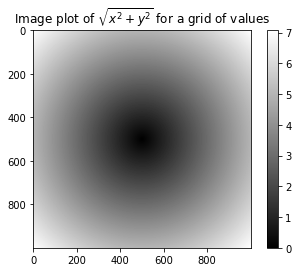

In [6]:
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2+y^2}$ for a grid of values")
plt.show()

### 将条件逻辑作为数组操作

<font color='red'>np.where</font>函数是三元表达式 x if condition else y 的向量化版本。<br>
假设我们有一个布尔数组和两个数值数组：

In [7]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

假设cond中为True时取xarr对应的元素，否则取yarr中的元素。<br>
列表表达式版本：

In [8]:
result = [(x if c else y)for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

这样处理在面对大型数据时会很慢，同时无法应对多维数组。<br>
np.where实现：

In [9]:
np.where(cond, xarr, yarr)

array([1.1, 2.2, 1.3, 1.4, 2.5])

<font color='orange'>个人看法： 记住比较操作和位逻辑操作哪些返回布尔数组的操作和函数，结合np.where可以起到很好的作用。布尔数组在numpy和pandas在都有很好的应用。</font>

---
np.where的第二个和第三个参数不需要是数组，可以是标量（<font color='red'>标量结合广播在数组中几乎是万能的</font>）。<br>
where在数据分析中的一个典型应用是根据一个数组来生成一个新的数组。假设有一个随机矩阵数据，希望将所有的正值替换成2，所有负值替换成-2，使用np.where会很容易实现：

In [11]:
arr = np.random.randn(4, 4)
arr

array([[-1.74710495, -1.23808675, -0.18767406, -1.35034602],
       [-0.78329685, -1.12889108, -0.86522066,  1.66897263],
       [ 0.89049634,  0.28702967, -0.34096627,  0.64142895],
       [-0.39769073, -0.23725862,  1.62637698, -1.23492705]])

In [12]:
arr > 0 # 之前提到的比较操作

array([[False, False, False, False],
       [False, False, False,  True],
       [ True,  True, False,  True],
       [False, False,  True, False]])

In [13]:
np.where(arr>0, 2, -2)

array([[-2, -2, -2, -2],
       [-2, -2, -2,  2],
       [ 2,  2, -2,  2],
       [-2, -2,  2, -2]])

> 当然我们也可以实现只替换正值部分：

In [14]:
np.where(arr>0, 2, arr)

array([[-1.74710495, -1.23808675, -0.18767406, -1.35034602],
       [-0.78329685, -1.12889108, -0.86522066,  2.        ],
       [ 2.        ,  2.        , -0.34096627,  2.        ],
       [-0.39769073, -0.23725862,  2.        , -1.23492705]])

### 数学和统计方法

许多关于整个数组统计值或关于轴向数据的科学函数，可以作为数组类型的方法被调用。可以使用聚合函数（缩减函数），比如sum，mean和std。

---
生成正态分布的随机数据，部分聚合统计数据：

In [15]:
arr = np.random.randn(5, 4)
arr

array([[-0.10299056, -0.63060164, -0.2953357 ,  0.12508069],
       [ 0.56001453,  0.61675604, -0.53186231,  2.09500987],
       [ 0.51659542, -0.11957713, -1.17511064, -0.51382924],
       [-1.34044236,  0.67097291,  0.75019536,  0.80096899],
       [ 0.27875909, -2.11594207,  0.69108065, -0.02778679]])

In [16]:
arr.mean()

0.012597754097615016

In [17]:
np.mean(arr)

0.012597754097615016

In [19]:
arr.sum()

0.2519550819523003

sum, mean类似的聚合函数都会接受一个axis参数，axis指定了聚合作用的轴，作用形成一个降维的数组。

In [20]:
arr.mean(axis=1) # 计算列方向的均值（行均值）

array([-0.2259618 ,  0.68497953, -0.3229804 ,  0.22042373, -0.29347228])

In [22]:
arr.sum(axis=0) # 计算行方向的和（列的和）

array([-0.08806389, -1.5783919 , -0.56103264,  2.47944351])

> 累积函数，例如cumsum,cumprod不会聚合，会产生一个中间结果：

In [23]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

> 指定维度上进行累积：

In [24]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [25]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [26]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

+ 基础统计方法表：

方法 | 描述
- | -
sum | 沿着轴向计算所有元素的累和， 0长度的数组，累和为0
mean | 数学平均，0长度的数组平均为NaN
std, var | 标准差和方差，可以选择自由度调整（默认分母是N）
min, max | 最小值和最大值
argmin, argmax | 最小值最大值的位置
cumsum | 从0开始元素累积和
cumprod | 从1开始元素累积积

### 布尔值的数组方法

> 统计布尔数组中真假的个数：

In [27]:
arr = np.array([True, False, True, True, False])
arr.sum()

3

布尔值会被强制为1（True）， 0（False）,所有sum可以用来统计个数。

> 布尔数组中很有用的any， all方法（参考原生python）：

In [28]:
arr.all()

False

In [29]:
arr.any()

True

<font color='red'>这两个方法同样可以用于非布尔数组， 所有非0元素都按True处理。</font>

In [30]:
arr = np.array([0, 0, -1])
arr.any()

True

### 排序

> 类似原生python，sort方法实现排序

In [32]:
arr = np.random.randn(6)
arr

array([ 1.70563939,  0.17387952,  0.77269455, -2.2319526 , -0.35464211,
       -1.37733051])

In [34]:
arr.sort()
arr

array([-2.2319526 , -1.37733051, -0.35464211,  0.17387952,  0.77269455,
        1.70563939])

> 同样可以指定axis轴向排序：

In [35]:
arr = np.random.randn(5, 3)
arr

array([[-1.73119663, -0.11279807,  0.51191045],
       [-0.57933543,  0.29833316,  1.70547214],
       [ 1.82410874,  0.52610159,  0.09794557],
       [-1.09251716,  0.48152414, -0.31389228],
       [-0.27751186, -0.92281739, -1.46662095]])

In [37]:
arr.sort(axis=0)
arr

array([[-1.73119663, -0.92281739, -1.46662095],
       [-1.09251716, -0.11279807, -0.31389228],
       [-0.57933543,  0.29833316,  0.09794557],
       [-0.27751186,  0.48152414,  0.51191045],
       [ 1.82410874,  0.52610159,  1.70547214]])

In [38]:
np.sort(arr, axis=1)

array([[-1.73119663, -1.46662095, -0.92281739],
       [-1.09251716, -0.31389228, -0.11279807],
       [-0.57933543,  0.09794557,  0.29833316],
       [-0.27751186,  0.48152414,  0.51191045],
       [ 0.52610159,  1.70547214,  1.82410874]])

In [39]:
arr

array([[-1.73119663, -0.92281739, -1.46662095],
       [-1.09251716, -0.11279807, -0.31389228],
       [-0.57933543,  0.29833316,  0.09794557],
       [-0.27751186,  0.48152414,  0.51191045],
       [ 1.82410874,  0.52610159,  1.70547214]])

<font color='red'>由此可见，np.sort()实现的排序后数据的拷贝，不是对原数组的改变。这个区别arr.sort()的，需要特别注意！</font><br>

> 计算一个数组的分位数，并选出分位数对应的值：

In [40]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(len(large_arr) * 0.05)] # 5%分位数

-1.6083430339425506

<font color='orange'>这样实现在数学上是不严谨的，没有考虑特殊情况的折中处理，个人建议：</font>

In [56]:
np.percentile(large_arr, 5)

-1.6103459871217187

### 唯一值与其他集合逻辑

> unique:

In [60]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [61]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

> in1d: 检查一个数组中的值是否在另一个数组中，返回布尔数组：

In [62]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

+ 集合函数表：

方法 | 描述
- | -
unique | 计算x的唯一值，并排序
intersect1d | 计算x和y的交集，并排序
union1d | 计算x和y的并集，并排序
in1d | 计算x中的元素是否包含在y中，返回一个布尔数组
setdiff1d | 差集，在x中但不在y中的x的元素
setxor1d | 异或集，在x或y中，但不属于x,y的交集的元素

## 使用数组进行文件输入和输出

只讨论numpy内建的二进制格式，大多数人都喜欢用pandas来载入文本或表格型数据。

> np.save,np.load是高效存取数据的工具，默认后缀名是.npy：

In [63]:
arr = np.arange(10)
np.save('some_array', arr) # 没有写后缀会自动添加.npy

In [64]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

> savez,未压缩文件中保存多个数组：

In [65]:
np.savez('array_archive.npz', a=arr, b=arr)

载入时会得到一个字典，通过字典载入单个数组：

In [66]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

当存在已经压缩好的数据需要再次压缩文件时，使用savez_compressed方法。

## 线性代数

线性代数，比如矩阵乘法，分解，行列式等方阵数学，是数组类库的重要组成部分。

> numpy中的矩阵点乘积不是*而是dot方法：

In [67]:
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([[6, 23], [-1, 7], [8, 9]])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [68]:
y

array([[ 6, 23],
       [-1,  7],
       [ 8,  9]])

In [69]:
x.dot(y)

array([[ 28,  64],
       [ 67, 181]])

In [70]:
np.dot(x, y)

array([[ 28,  64],
       [ 67, 181]])

> 特殊符号 @ 等效：

In [71]:
x @ y

array([[ 28,  64],
       [ 67, 181]])

> 求逆和行列式求解：

In [72]:
from numpy.linalg import inv, qr

In [73]:
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)

array([[ 1.49075109,  0.92855404,  0.25866553,  0.91894725,  0.42259515],
       [ 0.92855404,  1.02718028,  0.16237559,  0.90240942, -0.80667789],
       [ 0.25866553,  0.16237559,  0.17937163, -0.01178496,  0.24428873],
       [ 0.91894725,  0.90240942, -0.01178496,  1.31072514, -0.72063979],
       [ 0.42259515, -0.80667789,  0.24428873, -0.72063979,  4.13795613]])

In [74]:
mat.dot(inv(mat)) # 对角线外其他数都接近于0

array([[ 1.00000000e+00, -1.78247991e-16,  7.82912769e-17,
        -3.67501398e-16,  2.38516583e-16],
       [ 1.39155510e-16,  1.00000000e+00, -1.67151520e-16,
        -8.18237562e-16,  2.75894221e-15],
       [ 3.98750619e-16, -2.87733670e-17,  1.00000000e+00,
         2.67329336e-16,  4.10731348e-17],
       [ 6.57116705e-16, -7.78918661e-17,  2.18573202e-17,
         1.00000000e+00,  7.48727807e-16],
       [ 1.10678075e-17,  2.33233429e-16, -1.57849460e-17,
         2.75505306e-17,  1.00000000e+00]])

In [75]:
q, r = qr(mat)
r

array([[ -5.73049501,   6.21425474,   1.29182433,   0.98177882,
          1.94269568],
       [  0.        , -10.26582589,  16.35897067,   6.50670617,
         -1.84957716],
       [  0.        ,   0.        ,  -3.98136434,   0.58850469,
          0.35933882],
       [  0.        ,   0.        ,   0.        ,  -0.58592829,
         -0.1349816 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.23230076]])

+ 常用的numpy.linalg函数表：

函数 | 描述
:-: | :-:
diag | 将一个方矩阵对角（或非对角）元素作为一维数组返回，或者将一维数组转换成一个方矩阵，并且所有非对角线上有零点
dot | 矩阵点乘
trace | 计算对角元素和
det | 计算矩阵的行列式
eig | 计算方矩阵的特征值和特征向量
inv | 计算方矩阵的逆矩阵
pinv | 计算矩阵的Moore—Penrose伪逆
qr | 计算QR分解
svd | 计算奇异值分解（SVD）
solve | 求解x的线性系统 Ax = b, 其中x为方矩阵
lstsq | 计算Ax = b的最小二乘解

## 伪随机数生成

> normal生成正态分布样本数据：

In [76]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 1.333711  , -0.43852258,  0.41126243, -2.16768894],
       [ 1.09107118, -0.19413655,  0.09727386,  0.52564597],
       [ 0.01084102, -0.62524974,  0.40197415,  1.29600567],
       [-0.42908105, -1.4424027 ,  1.23923326, -0.04490156]])

> 比较python内建random:

In [77]:
from random import normalvariate

In [78]:
N = 1000000

In [79]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

819 ms ± 20.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [80]:
%timeit np.random.normal(size=N)

29.9 ms ± 483 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


伪随机数的意思是，所有的随机数是由具有确定性行为的算法根据随机数生成器中的*随机数种子*生成的。<br>
通过np.random.seed更改随机数种子

In [81]:
np.random.seed(1234) # 每次都需要设置才能保障生成一致的随机数

> 设置全局随机数种子

In [82]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

+ numpy.random中部分函数表：

函数 | 描述
- | -
seed | 向随机数生成器传递随机状态种子
permutation | 返回一个序列的随机排列，或者返回一个乱序的整数范围序列
shuffle | 随机排列一个序列
rand | 从均匀分布中抽取样本
randint | 根据给定的由低到高的范围抽取随机整数
randn | 从均值为0方差为1的正态分布中抽取样本
binomial | 从二项分布中抽取
normal | 从正态（高斯）分布中抽取样本
beta | 从beta分布中抽取样本
chisquare | 从卡方分布中抽取样本
gamma | 从伽马分布中抽取样本
uniform | 从均匀\[0, 1\)分布中抽取样本

## 示例：随机漫步

随机漫步模拟

In [83]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

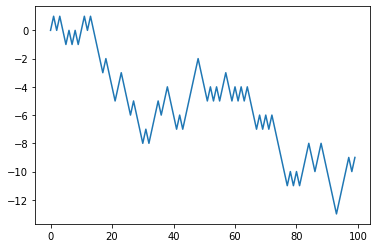

In [85]:
plt.plot(walk[:100])

> 利用numpy实现等效的随机漫步：

In [2]:
steps = 1000
draws = np.random.randint(0, 2, size=steps)
steps = np.where(draws>0, 1, -1)
walk = steps.cumsum()

In [3]:
walk.min(), walk.max() 

(-8, 36)

实现计算第一次在一个方向上累积10步的位置：

In [5]:
(np.abs(walk)>10).argmax()

328

### 一次性实现多次随机漫步

一次实现两个方向上的随机漫步，只需稍微修改上面的代码：

In [11]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))
steps = np.where(draws>0, 1, -1)
walks = steps.cumsum(axis=1)
walks

array([[  1,   0,   1, ...,   6,   5,   4],
       [ -1,  -2,  -1, ..., -14, -13, -14],
       [  1,   2,   3, ...,   2,   1,   0],
       ...,
       [ -1,   0,  -1, ...,  16,  15,  14],
       [ -1,   0,   1, ...,  50,  51,  50],
       [ -1,  -2,  -1, ..., -56, -55, -54]], dtype=int32)

检查是否在一个方向上走了30步,并得到累积达到30步行的时间：

In [13]:
hit30 = (np.abs(walks)>30).any(axis=1)
hit30

array([ True,  True, False, ..., False,  True,  True])

In [15]:
crossing_times = (np.abs(walks[hit30])>30).argmax(axis=1)
crossing_times

array([510, 674, 312, ..., 660, 858, 368], dtype=int64)

## 小结

numpy和pandas的学习都需要牢记数组风格。